# Predict the Cost of Homes in California (Using Numpy + Pandas in Jupyter)

This notebook will train a machine learning model that predicts home costs in California. 

Goal: predict the value of home prices using 9 feature variables and 1 target variable

#### **Feature Variables** ####

1.  **longitude:** A measure of how far west a house is (a higher value is farther west)
2.  **latitude:** A measure of how far north a house is (a higher value is farther north)
3.  **housingMedianAge:** Median age of a house within a block (a lower number is a newer building)
4.  **totalRooms:** Total number of rooms within a block
5.  **totalBedrooms:** Total number of bedrooms within a block
6.  **population:** Total number of people residing within a block
7.  **households:** Total number of households, a group of people residing within a home unit, for a block
8.  **medianIncome:** Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9.  **oceanProximity:** Location of the house in proximity to the ocean

#### **Target Variable** ####
1.  **medianHouseValue:** Median house value for households within a block (measured in US Dollars)

## Dependencies:
- pandas
- matplotlib
- seaborn
- scikit-learn
- numpy

## Obtaining & Loading Data:

In [64]:
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt 
%matplotlib inline

import numpy as np

In [65]:
# read in the data into a pandas dataframe:
housing_df = pd.read_csv('housing.csv')

# using .info() to show features in df as well as count & datatype
housing_df.info()

# using .shape to understand the # of rows/columns in the data frame
housing_df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


(20640, 10)

In [66]:
# using .head() to view the first few rows of dataset
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [67]:
# using .tail() to view last few rows
housing_df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [68]:
# using .describe() to see metrics about dataset
# count: count of non-null rows
# mean: average of values for given column
# std: standard deviation (how far off from mean)
# min: minimum of value
# 25%, 50%, 75%: 25th, 50th, 75th percentile
# max: maximum amount of value

housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Preparing & Preprocessing Data

In [69]:
# seeing which features have missing values

housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [70]:
# calculating % of missing total_bedrooms data:

housing_df['total_bedrooms'].isnull().sum()/housing_df.shape[0] * 100

1.002906976744186

# Using visualizations to understand the relationships between features

Histograms:

Text(0.5, 0, 'house values')

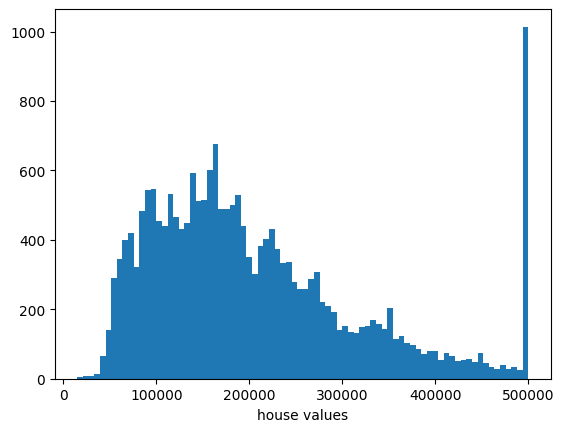

In [71]:
# plotting distribution of target variable (median_house_value) using a histogram

# note: bins = # of columns

plt.hist(housing_df['median_house_value'], bins=80)
plt.xlabel("house values")

notes: values are distributed with a few outliers, most of the houses are around 100-200k range

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

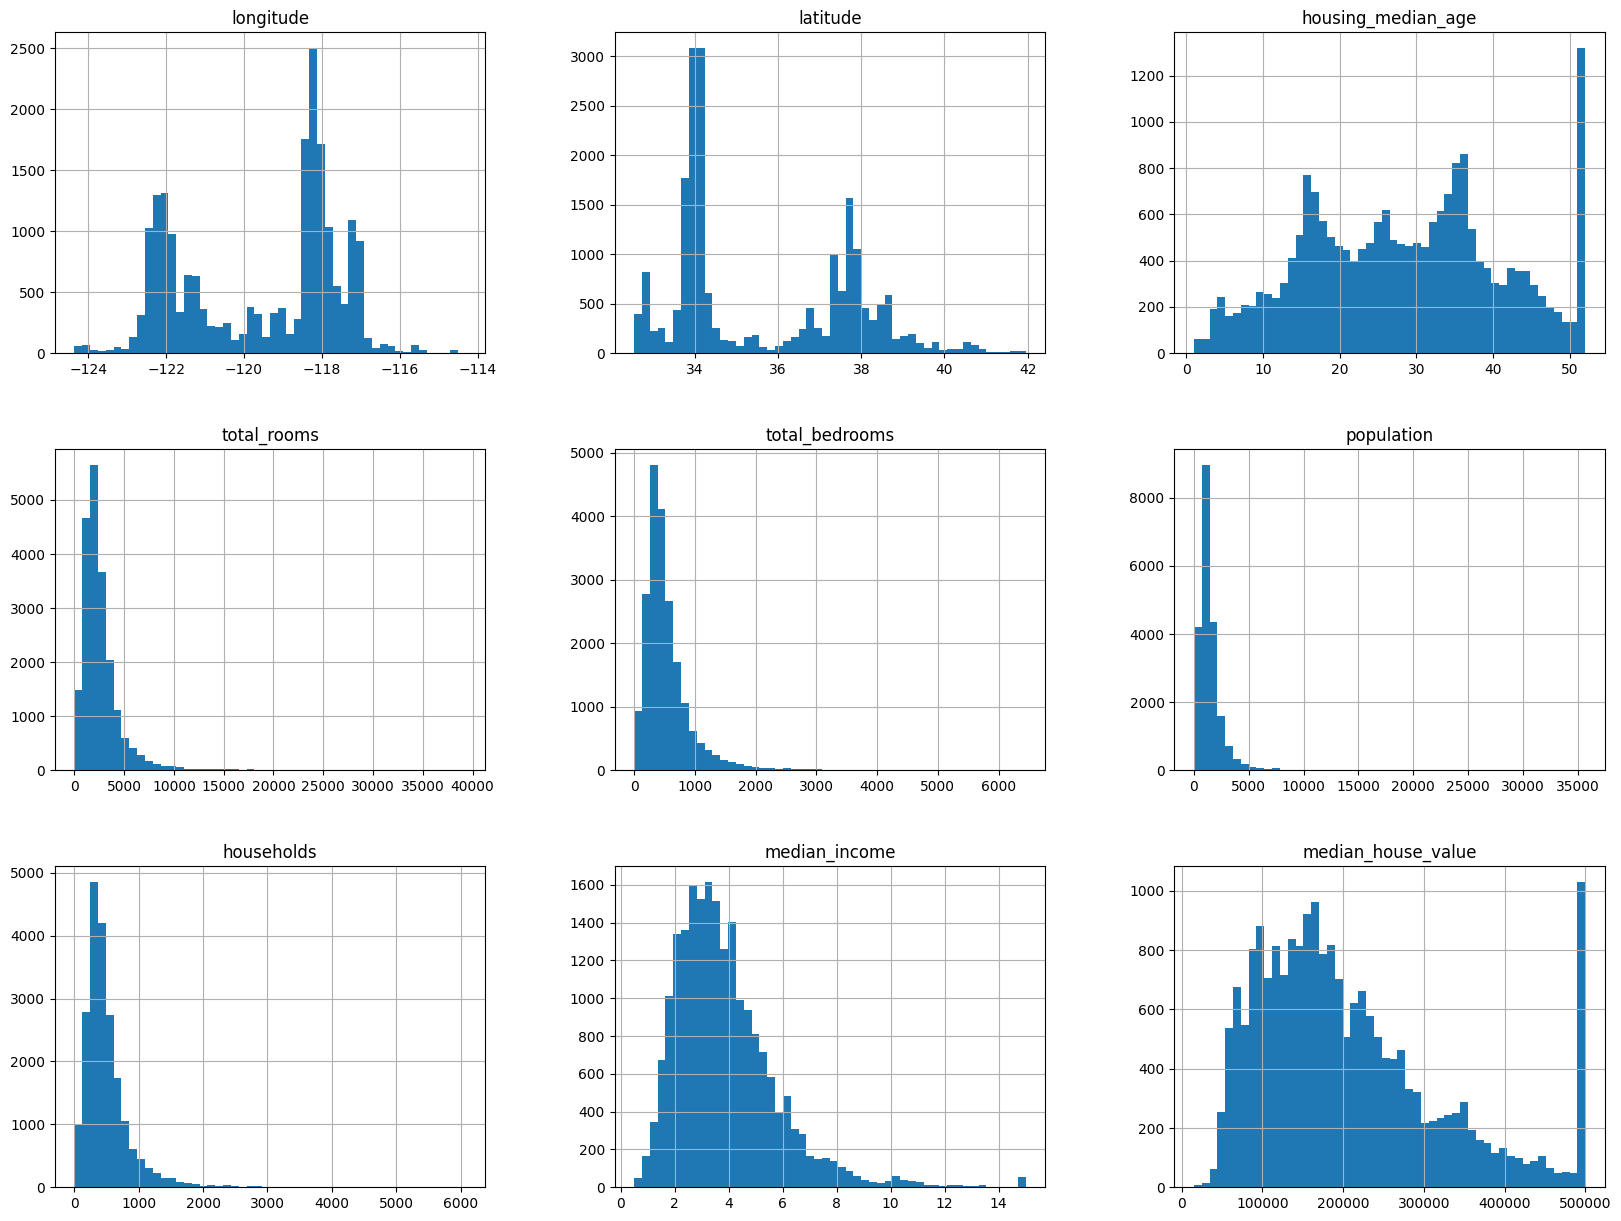

In [72]:
# plotting all features now
housing_df.hist(bins=50, figsize=(20, 15))

### using a heatmap to show correlation

In [73]:
corr = housing_df.corr(numeric_only=True)
print(corr)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

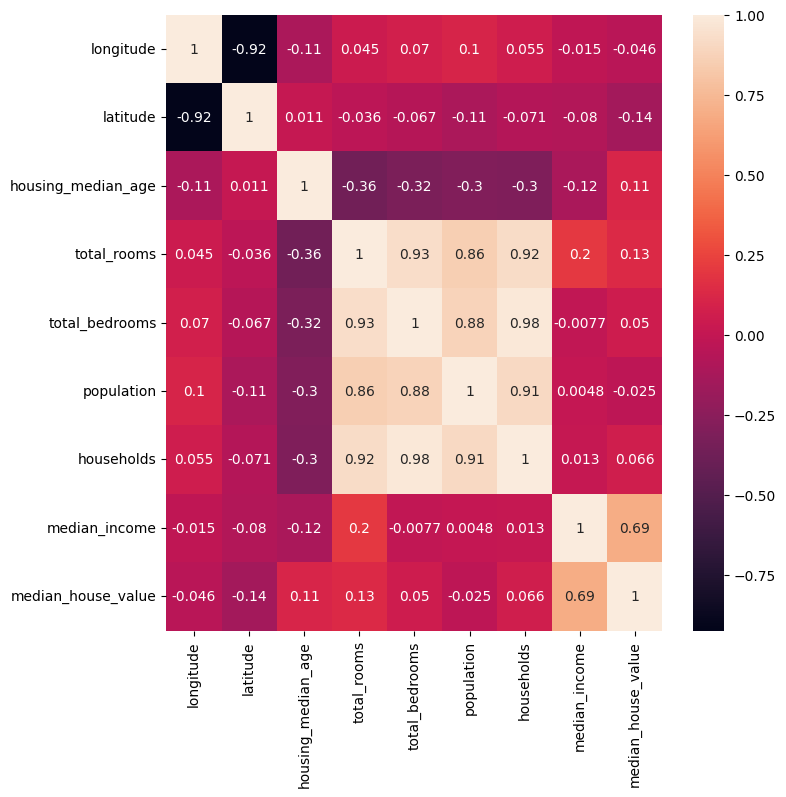

In [74]:
# making heatmap larger & nicer:

plt.figure(figsize=(8,8))

sns.heatmap(corr, annot=True)
plt.show()

# feature engineering: